In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')

In [3]:
dataset


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
X = dataset.iloc[:, 3:5].values

In [11]:
from sklearn.cluster import MeanShift
cluster_model = MeanShift(bandwidth=2).fit(X)

In [12]:
labels = cluster_model.fit_predict(X)

In [13]:
# Create DataFrame from the synthetic data
supervised = pd.DataFrame(dataset)

# Add cluster labels to DataFrame
supervised['cluster_group'] = labels

In [14]:
supervised

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster_group
0,1,Male,19,15,39,137
1,2,Male,21,15,81,136
2,3,Female,20,16,6,42
3,4,Female,23,16,77,43
4,5,Female,31,17,40,135
...,...,...,...,...,...,...
195,196,Female,35,120,79,48
196,197,Female,45,126,28,47
197,198,Male,32,126,74,46
198,199,Male,32,137,18,45


In [16]:
# Get the cluster centers
cluster_centers = cluster_model.cluster_centers_


In [17]:
n_clusters =len(cluster_centers)

In [18]:
n_clusters

138

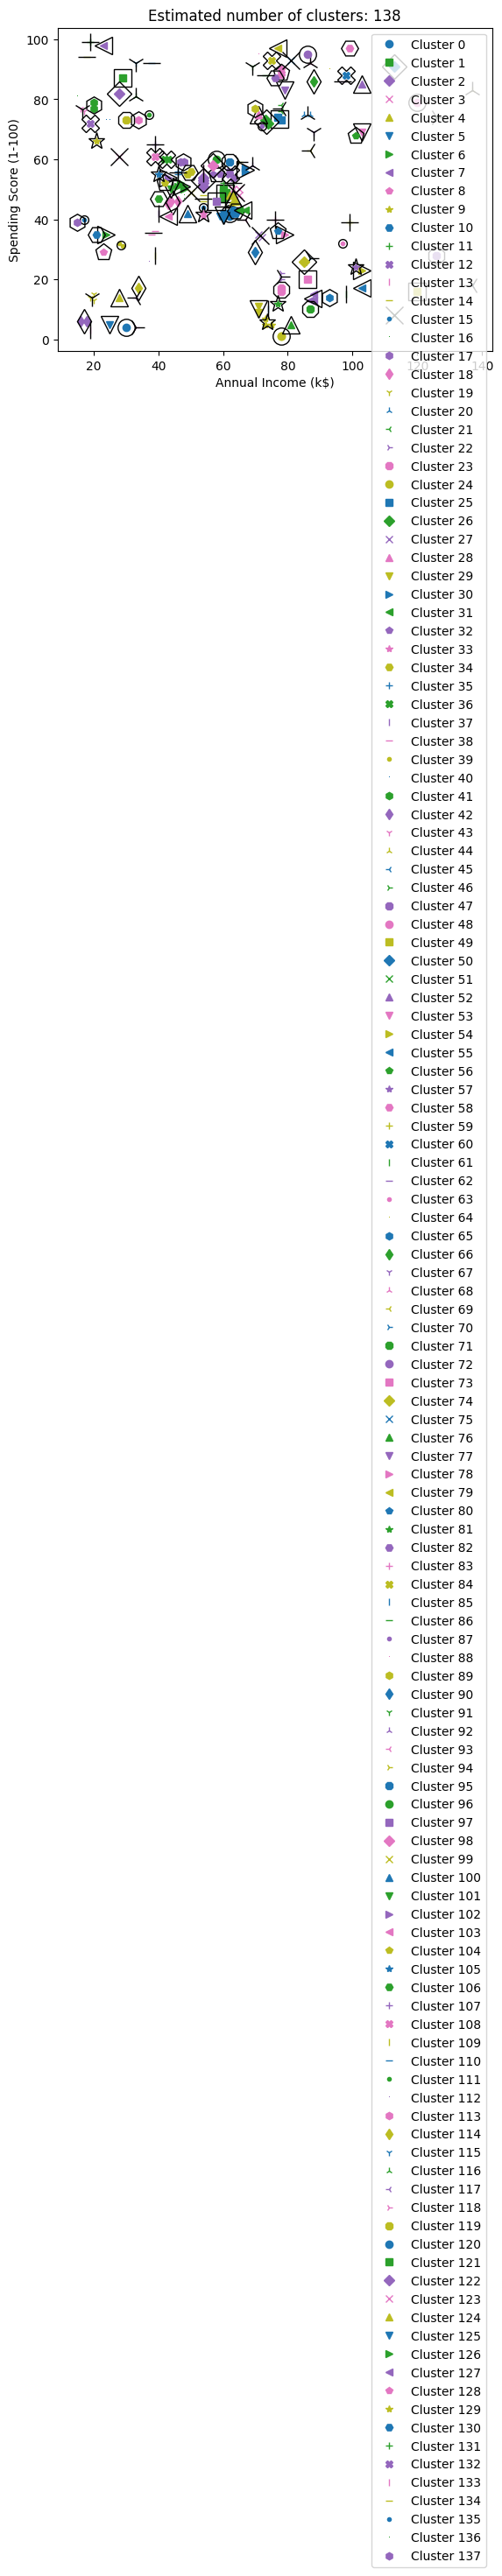

In [31]:
markers = ["o", "s", "D", "x", "^", "v", ">", "<", "p", "*", "H", "+", "X", "|", "_", ".", ",", "h", "d", "1", "2", "3", "4", "8"]  # Add more markers if needed

for k in range(n_clusters):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    marker_index = k % len(markers)  # Cycle through markers list
    marker = markers[marker_index]
    plt.plot(X[my_members, 0], X[my_members, 1], marker, markersize=6, label=f'Cluster {k}')
    plt.plot(cluster_center[0], cluster_center[1], marker, markerfacecolor='none', markeredgecolor="k", markersize=14)

plt.title("Estimated number of clusters: %d" % n_clusters)
plt.xlabel(dataset.columns[3])
plt.ylabel(dataset.columns[4])
plt.legend()
plt.show()




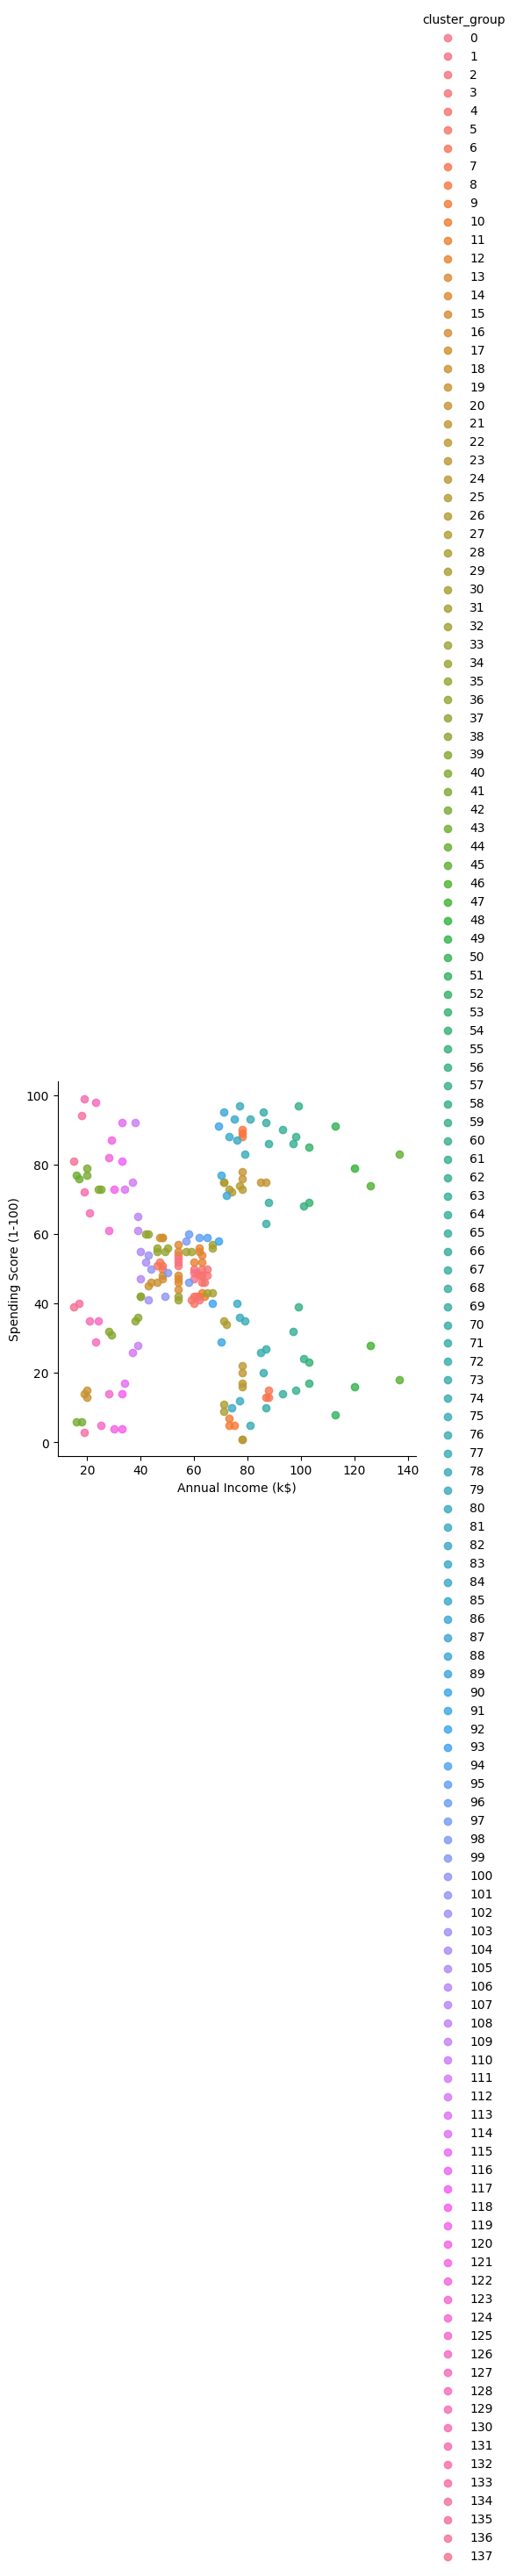

In [30]:
import seaborn as sns

sns.lmplot(
    data=supervised,
    x=supervised.columns[3],
    y=supervised.columns[4],
    hue=supervised.columns[5],
    fit_reg=False,
    facet_kws={'legend_out': True}  # Pass legend_out using facet_kws
)